In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union



Get stock data from yahoo finance library

In [68]:
def get_stock(stock_symbol, start, end):
  stock_data = yf.download(stock_symbol, start=start, end=end)
  # print(stock_data)
  stock_data['Daily return'] = stock_data['Close'].pct_change()
  # drop NaN in daily return
  stock_data = stock_data.dropna()

  # expect return
  # expect_return = stock_data['Daily return'].mean()
  return stock_data



In [69]:
stock_data = get_stock('AAPL', start='2020-01-01', end='2025-01-01')
stock_data


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Daily return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200,0.007968
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000,-0.004703
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,0.016086
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400,0.021241
...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176


In [74]:
p_win = 0
for ret in stock_data['Daily return']:
  if ret > 0: p_win += 1

p_win /= len(stock_data['Daily return'])
p_loss = 1 - p_win
print(p_win, p_loss)

0.5330151153540175 0.46698488464598253
1257
1257


In [ ]:
def get_info(stock: str, startDate: str, endDate: str):
    return yf.download(stock, start=startDate, end=endDate)

def get_price(df):
    return df['Close'].values

# sp500 = pd.read_csv('sp500.csv', index_col='date', sep=";")

# returns_sp500 = sp500['sp500'].pct_change()
# shift_returns_sp500 = returns_sp500.shift(-1)

# expanding_kelly = get_kelly(returns_sp500)

# parameters_df = pd.DataFrame()
# parameters_df['kelly'] = expanding_kelly
# parameters_df['Next day return'] = shift_returns_sp500
# parameters_df['mean'] = returns_sp500.expanding(400).mean()

# # prepare data using yfinance
df = get_info('AAPL', '2020-01-01', '2025-01-01')
# # extract close col, calcurate simple returns
# df['PriceChange'] = df['Close'].pct_change()
# price_change = df['PriceChange']
# price_change = price_change.dropna()
# df = df.dropna() # drop Nan value

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


Plot for closing price

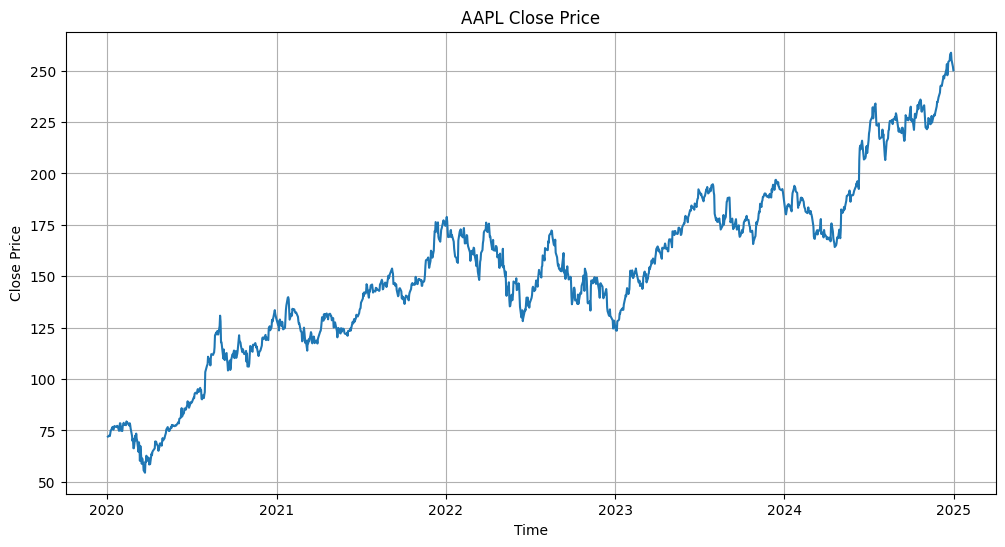

In [ ]:
# plot Close price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.grid(True)
plt.show()


Plot for price change

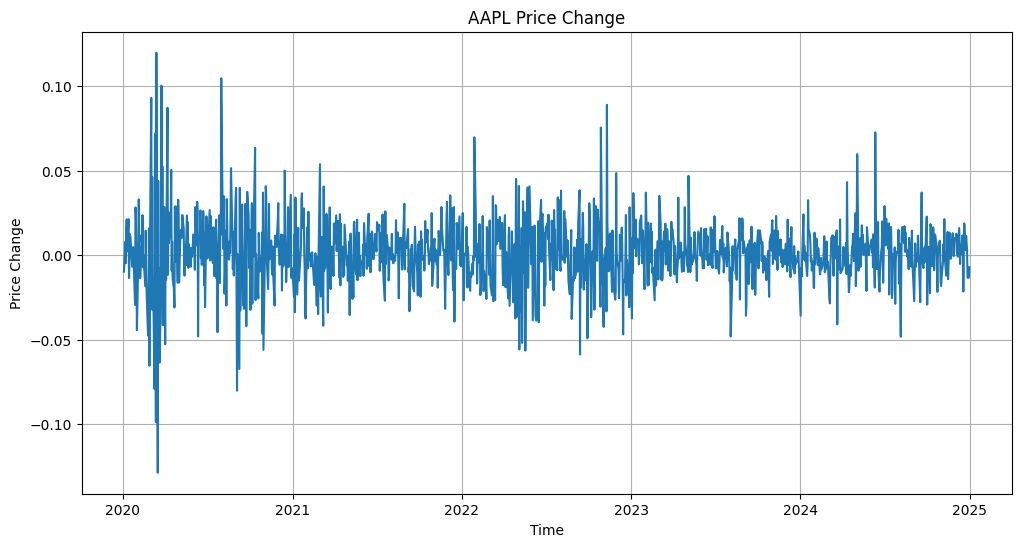

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, price_change)
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.title('AAPL Price Change')
plt.grid(True)
plt.show()


In [ ]:
def get_kelly(
    returns: Union[pd.DataFrame, pd.Series],
    window: int = 400,
    r: float = 0.02,
    correlation: bool = False,
    days: int = 300,
) -> pd.DataFrame:
    """Calculates the Kelly optimal investment fraction."""

    r_adjusted = (1 + r) ** (1 / days) - 1  # Convert annual risk-free rate to daily

    mean_returns = returns.rolling(window=window, min_periods=window).mean()
    excess_returns = mean_returns - r_adjusted

    if correlation:
        rolling_cov = returns.rolling(window=window, min_periods=window).cov()
        kelly = excess_returns.div(rolling_cov.groupby(level=0).mean())
    else:
        rolling_var = returns.rolling(window=window, min_periods=window).var()
        kelly = excess_returns / (rolling_var + 1e-8)  # Avoid division by zero

    return kelly

In [ ]:
parameters_df = pd.DataFrame()
returns = df['PriceChange']  # Keep as Series

# Separate positive & negative returns
pos_ret = returns[returns > 0]
neg_ret = returns[returns < 0]

# Shifted returns for next day
shift_return = df['PriceChange'].shift(-1)
# print(shift_return)
# Compute Kelly Criterion
kelly_values = get_kelly(df[['PriceChange']], window=300)
# print(kelly_values)

kelly_values = kelly_values.dropna()
print(kelly_values)


# Populate parameters DataFrame
parameters_df['Kelly'] = kelly_values
parameters_df['Next day return'] = shift_return
parameters_df['mean'] = df['PriceChange'].mean()

# parameters_df.dropna(inplace=True)

# print(parameters_df.head())  # Debugging step to check the output


Price      PriceChange
Ticker                
Date                  
2021-03-12    2.439231
2021-03-15    2.577075
2021-03-16    2.595998
2021-03-17    2.588474
2021-03-18    2.370794
...                ...
2024-12-24    6.809638
2024-12-26    7.035143
2024-12-27    6.913917
2024-12-30    6.692315
2024-12-31    6.850674

[958 rows x 1 columns]


[<Axes: > <Axes: >]


Text(0.5, 1.0, 'Kelly optimal $f^*$ evolution')

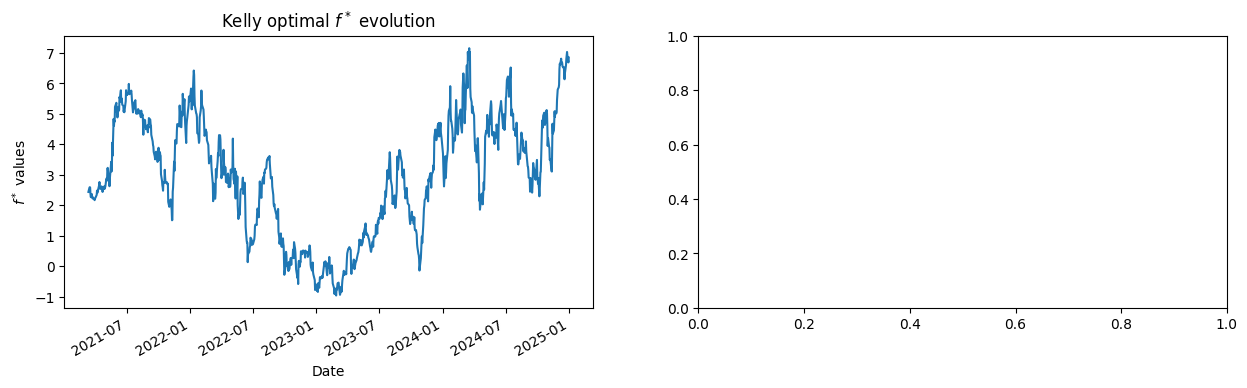

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
print(ax)

# ✅ Ensure Kelly values are plotted correctly

parameters_df['Kelly'].dropna().plot(ax=ax[0])
ax[0].set_ylabel('$f^*$ values')
ax[0].set_title('Kelly optimal $f^*$ evolution')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kelly_formula(b, p, q):
    return (b * p - q) / b

periods = 365
p = len(pos_ret) / periods # probability of winning
q = 1 - p # probability of losing
b = np.mean(pos_ret) / abs(np.mean(neg_ret)) # compare win and lose
kelly_fraction = kelly_formula(b, p, q)

# Output the results
print(f"p (win rate): {p}")
print(f"q (loss rate): {q}")
print(f"b (risk/reward ratio): {b}")
print(f"Kelly fraction: {kelly_fraction}")
# backtesting process
# things containing in a new data frame
# kelly fraction per day, next day return, additional stats
new_df = pd.DataFrame(columns=["Kelly fraction per day"])
new_df["Next day returns"] = df['PriceChange'].shift(-1)
print(new_df)

# for i in range(len(returns)):
#   p = []
#   q = []
#   for ret in returns[0:i+1]:
#     if ret > 0: p.append(ret)
#     else: q.append(ret)
#   b = np.mean(p) / abs(np.mean(q))
#   kelly_value = get_kelly(df[['PriceChange']], window=300)
#   new_df.loc[i,"Kelly fraction per day"] = kelly_frac
# print(new_df)

# simulate expected growth rate
init_cap = 1000
capital = init_cap
portfolio_values = [capital]

# plt.plot(portfolio_values)
# plt.title("Portfolio Growth Using Kelly Criterion")
# plt.xlabel("Time (Days)")
# plt.ylabel("Portfolio Value")


p (win rate): 1.8356164383561644
q (loss rate): -0.8356164383561644
b (risk/reward ratio): 1.0298538317010253
Kelly fraction: 2.6470096794493823
           Kelly fraction per day  Next day returns
Date                                               
2020-01-03                    NaN          0.007968
2020-01-06                    NaN         -0.004703
2020-01-07                    NaN          0.016086
2020-01-08                    NaN          0.021241
2020-01-09                    NaN          0.002260
...                           ...               ...
2024-12-24                    NaN          0.003176
2024-12-26                    NaN         -0.013242
2024-12-27                    NaN         -0.013263
2024-12-30                    NaN         -0.007058
2024-12-31                    NaN               NaN

[1257 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


Price      PriceChange
Ticker                
Date                  
2023-12-15    4.140929
2023-12-18    4.573220
2023-12-19    4.610722
2023-12-20    4.604214
2023-12-21    4.655062
2023-12-22    4.208404
2023-12-26    4.656017
2023-12-27    4.324435
2023-12-28    4.232822
2023-12-29    4.148184


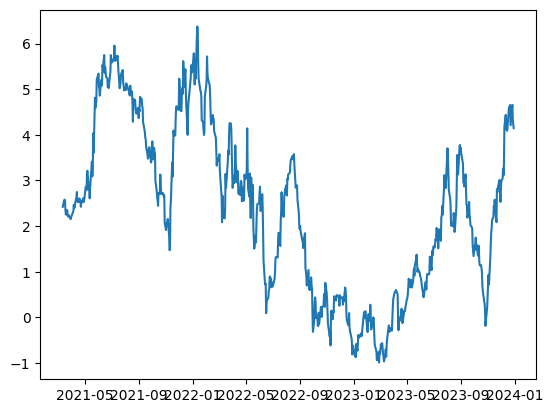

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from typing import Union

# 🔹 Step 1: Define the Kelly Criterion function
def get_kelly(
    returns: Union[pd.DataFrame, pd.Series],
    window: int = 1000,
    r: float = 0.02,
    correlation: bool = False,
    days: int = 250,
) -> pd.DataFrame:
    """Calculates the Kelly optimal investment fraction."""

    r_adjusted = (1 + r) ** (1 / days) - 1  # Convert annual risk-free rate to daily

    mean_returns = returns.rolling(window=window, min_periods=window).mean()
    excess_returns = mean_returns - r_adjusted

    if correlation:
        rolling_cov = returns.rolling(window=window, min_periods=window).cov()
        kelly = excess_returns.div(rolling_cov.groupby(level=0).mean())
    else:
        rolling_var = returns.rolling(window=window, min_periods=window).var()
        kelly = excess_returns / (rolling_var + 1e-8)  # Avoid division by zero

    return kelly

# 🔹 Step 2: Fetch historical stock data
ticker = "AAPL"  # Choose your stock symbol
df = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# 🔹 Step 3: Compute daily returns
df["PriceChange"] = df["Close"].pct_change()

# 🔹 Step 4: Compute Kelly Criterion
kelly_values = get_kelly(df[['PriceChange']], window=300)

# 🔹 Step 5: Display results
print(kelly_values.tail(10))  # Show last 10 values
plt.plot(kelly_values)
plt.show()


In [ ]:
# portfolio simulation
new_df["Next day returns"] = df['PriceChange'].shift(-1)
print(new_df["Next day returns"])
capital = 1000
capital = capital + kelly_values * new_df["Next day returns"]

Date
2020-01-03    0.007968
2020-01-06   -0.004703
2020-01-07    0.016086
2020-01-08    0.021241
2020-01-09    0.002261
                ...   
2024-12-24         NaN
2024-12-26         NaN
2024-12-27         NaN
2024-12-30         NaN
2024-12-31         NaN
Name: Next day returns, Length: 1257, dtype: float64


ValueError: cannot join with no overlapping index names